In [65]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
!pip3 install missingno
import cufflinks as cf 

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import  RadiusNeighborsClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import NuSVC
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import xgboost as xgb
from sklearn.linear_model import RidgeClassifier
from catboost import Pool, CatBoostClassifier, cv
import lightgbm as lgb
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected=True)  
import plotly.figure_factory as ff

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV
import random


In [2]:
def random_colors(number_of_colors):
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                 for i in range(number_of_colors)]
    return color

In [3]:
train = pd.read_csv("pima-indians-diabetes.csv")

In [4]:
train.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [5]:
train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
train.shape

(768, 9)

In [7]:
iplot(ff.create_table(train.describe().reset_index().round(3)),filename='jupyter-table2')

In [8]:
train.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

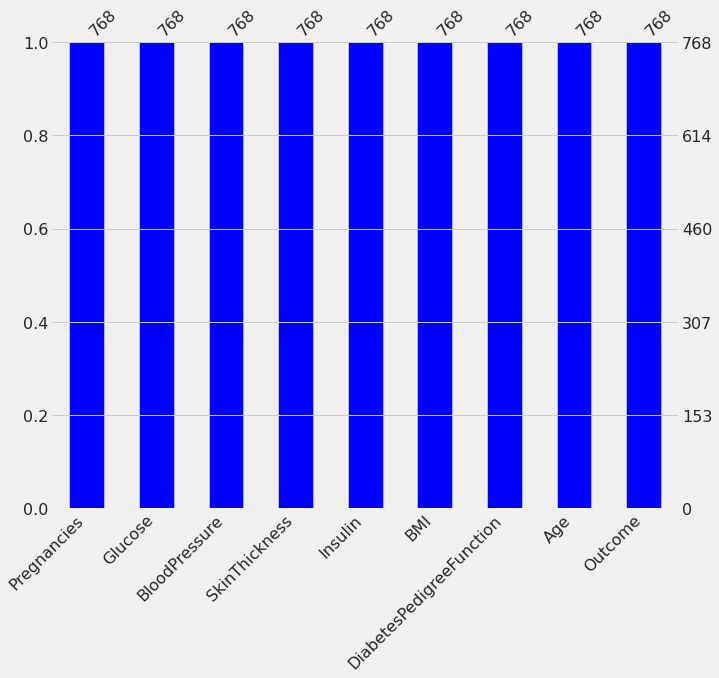

In [9]:
msno.bar(train, color = 'b', figsize = (10,8))

In [10]:
species_count = train['Outcome'].value_counts()
data = [go.Bar(
    x = species_count.index,
    y = species_count.values,
    marker = dict(color = random_colors(3),line=dict(color='#000000', width=2))
)]

layout = go.Layout(
   {
      "title":"Healthy VS DIabetic",
   }
)

fig = go.Figure(data=data,layout = layout)
iplot(fig)

In [11]:
trace = go.Pie(labels = list(train.Outcome.unique()), values = list(train.Outcome.value_counts()),
                            hole = 0.2,
               marker=dict(colors = random_colors(3), 
                           line=dict(color='#000000', width=2)
                           ))
data = [trace]
layout = go.Layout(
   {
      "title":"Healthy VS Diabetic",
   }
)

fig = go.Figure(data=data,layout = layout)
iplot(fig)

In [12]:
data = [go.Heatmap(z = np.array(train.corr().values),
                   x = np.array(train.corr().columns),
                   y = np.array(train.corr().columns),
                     colorscale='Viridis',)
       ]
layout = go.Layout(dict(title = 'Correlation Matrix for variables',
                            #autosize = False,
                            #height  = 1400,
                            #width   = 1600,
                            margin  = dict(r = 0 ,l = 100,
                                           t = 0,b = 100,
                                         ),
                            yaxis   = dict(tickfont = dict(size = 9)),
                            xaxis   = dict(tickfont = dict(size = 9)),
                           )
                      )

fig = go.Figure(data=data,layout = layout)
iplot(fig)

In [13]:
trace0 = go.Box(
    name = 'Pregnancies',
    y = train["Pregnancies"]
)


data = [trace0]


layout = go.Layout(
   {
      "title":"Pregnancies ",
   }
)


fig = go.Figure(data=data,layout = layout)
iplot(fig)

In [15]:
Diabetic = train[(train['Outcome'] != 0)]
Healthy = train[(train['Outcome'] == 0)]

tmp1 = Diabetic["Pregnancies"]
tmp2 = Healthy["Pregnancies"]
hist_data = [tmp1, tmp2]
    
group_labels = ['diabetic', 'healthy']
colors = random_colors(2)

fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = 0, curve_type='kde')
    
fig['layout'].update(title = "Pregnancies")

py.iplot(fig, filename = 'Density plot')

In [16]:
fig = go.Figure(
    data=[go.Histogram(x=train['Pregnancies'])],layout_title_text=' Pregnancies Distribution ',layout_title_font =dict(size= 36),layout_title_x=0.5)
fig.show()

In [17]:
fig = px.violin(train, y="Pregnancies", box=True, # draw box plot inside the violin
                points='all', # can be 'outliers', or False
               )
fig.show()

In [18]:
cols = "Glucose"
trace0 = go.Box(
    name = cols,
    y = train[cols]
)


data = [trace0]


layout = go.Layout(
   {
      "title":cols,
   }
)

fig = go.Figure(data=data,layout = layout)
iplot(fig)

In [19]:

Diabetic = train[(train['Outcome'] != 0)]
Healthy = train[(train['Outcome'] == 0)]

tmp1 = Diabetic[cols]

tmp2 = Healthy[cols]
hist_data = [tmp1, tmp2]
    
group_labels = ['diabetic', 'healthy']
colors = random_colors(2)

fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = 0, curve_type='kde')
    
fig['layout'].update(title = cols)

py.iplot(fig, filename = 'Density plot')

In [20]:
fig = go.Figure(
    data=[go.Histogram(x=train[cols])],layout_title_text=cols,layout_title_font =dict(size= 36),layout_title_x=0.5)
fig.show()

In [21]:
fig = px.violin(train, y=cols, box=True, # draw box plot inside the violin
                points='all', # can be 'outliers', or False
               )
fig.show()

In [22]:
cols = "BloodPressure"
trace0 = go.Box(
    name = cols,
    y = train[cols]
)


data = [trace0]


layout = go.Layout(
   {
      "title":cols,
   }
)

fig = go.Figure(data=data,layout = layout)
iplot(fig)

In [23]:

Diabetic = train[(train['Outcome'] != 0)]
Healthy = train[(train['Outcome'] == 0)]

tmp1 = Diabetic[cols]

tmp2 = Healthy[cols]
hist_data = [tmp1, tmp2]
    
group_labels = ['diabetic', 'healthy']
colors = random_colors(2)

fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = 0, curve_type='kde')
    
fig['layout'].update(title = cols)

py.iplot(fig, filename = 'Density plot')

In [24]:
fig = go.Figure(
    data=[go.Histogram(x=train[cols])],layout_title_text=cols,layout_title_font =dict(size= 36),layout_title_x=0.5)
fig.show()

In [25]:
fig = px.violin(train, y=cols, box=True, # draw box plot inside the violin
                points='all', # can be 'outliers', or False
               )
fig.show()

In [26]:
cols = "SkinThickness"
trace0 = go.Box(
    name = cols,
    y = train[cols]
)


data = [trace0]


layout = go.Layout(
   {
      "title":cols,
   }
)

fig = go.Figure(data=data,layout = layout)
iplot(fig)

In [29]:

Diabetic = train[(train['Outcome'] != 0)]
Healthy = train[(train['Outcome'] == 0)]

tmp1 = Diabetic[cols]

tmp2 = Healthy[cols]
hist_data = [tmp1, tmp2]
    
group_labels = ['diabetic', 'healthy']
colors = random_colors(2)

fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = 0, curve_type='kde')
    
fig['layout'].update(title = cols)

py.iplot(fig, filename = 'Density plot')

In [30]:
fig = go.Figure(
    data=[go.Histogram(x=train[cols])],layout_title_text=cols,layout_title_font =dict(size= 36),layout_title_x=0.5)
fig.show()

In [31]:
cols = "Insulin"
trace0 = go.Box(
    name = cols,
    y = train[cols]
)


data = [trace0]


layout = go.Layout(
   {
      "title":cols,
   }
)

fig = go.Figure(data=data,layout = layout)
iplot(fig)

In [34]:

Diabetic = train[(train['Outcome'] != 0)]
Healthy = train[(train['Outcome'] == 0)]

tmp1 = Diabetic[cols]

tmp2 = Healthy[cols]
hist_data = [tmp1, tmp2]
    
group_labels = ['diabetic', 'healthy']
colors = random_colors(2)

fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = 0, curve_type='kde')
    
fig['layout'].update(title = cols)

py.iplot(fig, filename = 'Density plot')

In [35]:
fig = go.Figure(
    data=[go.Histogram(x=train[cols])],layout_title_text=cols,layout_title_font =dict(size= 36),layout_title_x=0.5)
fig.show()

In [36]:
fig = px.violin(train, y=cols, box=True, # draw box plot inside the violin
                points='all', # can be 'outliers', or False
               )
fig.show()

In [37]:
cols = "BMI"
trace0 = go.Box(
    name = cols,
    y = train[cols]
)


data = [trace0]


layout = go.Layout(
   {
      "title":cols,
   }
)

fig = go.Figure(data=data,layout = layout)
iplot(fig)

In [38]:

Diabetic = train[(train['Outcome'] != 0)]
Healthy = train[(train['Outcome'] == 0)]

tmp1 = Diabetic[cols]

tmp2 = Healthy[cols]
hist_data = [tmp1, tmp2]
    
group_labels = ['diabetic', 'healthy']
colors = random_colors(2)

fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = 0, curve_type='kde')
    
fig['layout'].update(title = cols)

py.iplot(fig, filename = 'Density plot')

In [39]:
fig = go.Figure(
    data=[go.Histogram(x=train[cols])],layout_title_text=cols,layout_title_font =dict(size= 36),layout_title_x=0.5)
fig.show()

In [40]:
fig = px.violin(train, y=cols, box=True, # draw box plot inside the violin
                points='all', # can be 'outliers', or False
               )
fig.show()

In [41]:
cols = "DiabetesPedigreeFunction"
trace0 = go.Box(
    name = cols,
    y = train[cols]
)


data = [trace0]


layout = go.Layout(
   {
      "title":cols,
   }
)

fig = go.Figure(data=data,layout = layout)
iplot(fig)

In [42]:

Diabetic = train[(train['Outcome'] != 0)]
Healthy = train[(train['Outcome'] == 0)]

tmp1 = Diabetic[cols]

tmp2 = Healthy[cols]
hist_data = [tmp1, tmp2]
    
group_labels = ['diabetic', 'healthy']
colors = random_colors(2)

fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = 0, curve_type='kde')
    
fig['layout'].update(title = cols)

py.iplot(fig, filename = 'Density plot')

In [43]:
fig = go.Figure(
    data=[go.Histogram(x=train[cols])],layout_title_text=cols,layout_title_font =dict(size= 36),layout_title_x=0.5)
fig.show()

In [44]:
fig = px.violin(train, y=cols, box=True, # draw box plot inside the violin
                points='all', # can be 'outliers', or False
               )
fig.show()

In [45]:
cols = "Age"
trace0 = go.Box(
    name = cols,
    y = train[cols]
)


data = [trace0]


layout = go.Layout(
   {
      "title":cols,
   }
)

fig = go.Figure(data=data,layout = layout)
iplot(fig)

In [46]:

Diabetic = train[(train['Outcome'] != 0)]
Healthy = train[(train['Outcome'] == 0)]

tmp1 = Diabetic[cols]

tmp2 = Healthy[cols]
hist_data = [tmp1, tmp2]
    
group_labels = ['diabetic', 'healthy']
colors = random_colors(2)

fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = 0, curve_type='kde')
    
fig['layout'].update(title = cols)

py.iplot(fig, filename = 'Density plot')

In [47]:
fig = go.Figure(
    data=[go.Histogram(x=train[cols])],layout_title_text=cols,layout_title_font =dict(size= 36),layout_title_x=0.5)
fig.show()

In [48]:
fig = px.violin(train, y=cols, box=True, # draw box plot inside the violin
                points='all', # can be 'outliers', or False
               )
fig.show()

In [49]:
X = train.iloc[:,:-1].values
y = train.iloc[:,-1].values
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Logistic Regression

In [50]:
## Logistic Regression

Model = LogisticRegression()
Model.fit(X_train, y_train)
y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

[[78 21]
 [18 37]]
accuracy is 0.7467532467532467


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [51]:
from sklearn import preprocessing

In [52]:
X = np.array(X)
y = np.array(y)

In [53]:
scaler = preprocessing.MinMaxScaler()

X_norm = scaler.fit_transform(X)

In [54]:
for i, elem in enumerate(X_norm[0:1]):
    print(elem, " !! ", X[i][0])
# print(X_norm[0])

[0.35294118 0.74371859 0.59016393 0.35353535 0.         0.50074516
 0.23441503 0.48333333]  !!  6.0


In [55]:
## Logistic Regression
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_norm, y, test_size = 0.2, random_state = 42)
Model = LogisticRegression(penalty = 'l2')
Model.fit(X_train_norm, y_train)
y_pred = Model.predict(X_test_norm)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83        99
           1       0.71      0.58      0.64        55

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.73       154
weighted avg       0.76      0.77      0.76       154

[[86 13]
 [23 32]]
accuracy is 0.7662337662337663


In [56]:
X_new = np.zeros((768, 17))
# print(X_new.size())

In [57]:
print(X_new[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [58]:
print('Pregnancies: 0')
print('Glucose: 1')
print('BloodPressure: 2')
print('SkinThickness: 3')
print('Insulin: 4')
print('BMI: 5')
print('DiabetesPedigreeFunction: 6')
print('Age: 7')

Pregnancies: 0
Glucose: 1
BloodPressure: 2
SkinThickness: 3
Insulin: 4
BMI: 5
DiabetesPedigreeFunction: 6
Age: 7


In [59]:
train.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [60]:
for i, elem in enumerate(X):
    if elem[7] <= 30 and elem[1] <=120:
        X_new[i][0] = 0
    else:
        X_new[i][0] = 1
    
    if elem[1] <= 105 and elem[2] <= 80:
        X_new[i][1] = 0
    else:
        X_new[i][1] = 1
    
    if elem[5] <= 30:
        X_new[i][2] = 0
    else:
        X_new[i][2] = 1
    
    if elem[7] <= 30 and elem[0] <= 6:
        X_new[i][3] = 0
    else:
        X_new[i][3] = 1
    
    if elem[3] <= 20:
        X_new[i][4] = 0
    else:
        X_new[i][4] = 1
    
    if elem[1] <= 105 and elem[5] <= 30:
        X_new[i][6] = 0
    else:
        X_new[i][6] = 1
    
    if elem[5] <= 30 and elem[3] <= 20:
        X_new[i][5] = 0
    else:
        X_new[i][5] = 1
    
    if elem[4] <= 200:
        X_new[i][7] = 0
    else: 
        X_new[i][7] = 1
    
    if elem[2] <= 80:
        X_new[i][8] = 0
    else:
        X_new[i][8] = 1
    
    X_new[i][9] = X_norm[i][0]
    X_new[i][10] = X_norm[i][1]
    X_new[i][11] = X_norm[i][2]
    X_new[i][12] = X_norm[i][3]
    X_new[i][13] = X_norm[i][4]
    X_new[i][14] = X_norm[i][5]
    X_new[i][15] = X_norm[i][6]
    X_new[i][16] = X_norm[i][7]

In [122]:
index123456789 = 2
print(X_new[index123456789])
# print(X_norm[0])
print(y[index123456789])

[1.         1.         0.         1.         0.         0.
 1.         0.         0.         0.47058824 0.91959799 0.52459016
 0.         0.         0.34724292 0.25362938 0.18333333]
1


In [62]:
## Logistic Regression
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 42)
Model = LogisticRegression(penalty = 'l2')
Model.fit(X_train_new, y_train)
y_pred = Model.predict(X_test_new)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82        99
           1       0.67      0.69      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154

[[80 19]
 [17 38]]
accuracy is 0.7662337662337663


# lgb для LightGBM

In [63]:
## Logistic Regression
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 42)
Model = lgb.LGBMClassifier()
Model.fit(X_train_new, y_train)
y_pred = Model.predict(X_test_new)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.80      0.73      0.76        99
           1       0.58      0.67      0.62        55

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.71      0.71       154

[[72 27]
 [18 37]]
accuracy is 0.7077922077922078


In [75]:
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 42)
logistic = lgb.LGBMClassifier()
distributions = dict(penalty=['l2', 'l1'])
clf = RandomizedSearchCV(logistic, distributions, random_state = 0)
search = clf.fit(X_train_new, y_train)
search.best_params_

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:278: UserWarning:

The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.



[LightGBM] [Warning] Unknown parameter: penalty
[LightGBM] [Warning] Unknown parameter: penalty
[LightGBM] [Warning] Unknown parameter: penalty
[LightGBM] [Warning] Unknown parameter: penalty
[LightGBM] [Warning] Unknown parameter: penalty
[LightGBM] [Warning] Unknown parameter: penalty
[LightGBM] [Warning] Unknown parameter: penalty
[LightGBM] [Warning] Unknown parameter: penalty
[LightGBM] [Warning] Unknown parameter: penalty
[LightGBM] [Warning] Unknown parameter: penalty
[LightGBM] [Warning] Unknown parameter: penalty


{'penalty': 'l2'}

In [79]:
y_pred = search.predict(X_test_new)
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.80      0.73      0.76        99
           1       0.58      0.67      0.62        55

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.71      0.71       154

[[72 27]
 [18 37]]
accuracy is 0.7077922077922078


In [88]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [108]:
X_new2 = np.zeros((768, 9))
for i, elem in enumerate(X_new):
    X_new2[i][0] = X_new[i][0]
    X_new2[i][1] = X_new[i][1]
    X_new2[i][2] = X_new[i][2]
    X_new2[i][3] = X_new[i][3]
    X_new2[i][4] = X_new[i][4]
    X_new2[i][5] = X_new[i][5]
    X_new2[i][6] = X_new[i][6]
    X_new2[i][7] = X_new[i][7]
    X_new2[i][8] = X_new[i][8]

In [116]:
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new2, y, test_size = 0.2, random_state = 42)
model = lgb.LGBMClassifier()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1)
n_scores = cross_val_score(model, X_train_new, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.746 (0.034)


In [140]:
for i, elem in enumerate(X_new2[0:1]):
    print(X_new2[i])
    # print(X_norm[0])
    print(np.sum(elem))
    print(y[i])

[1. 1. 1. 1. 1. 1. 1. 0. 0.]
7.0
1


In [95]:
# model = lgb.LGBMClassifier()
# distributions = dict(penalty=['l2', 'l1'])
# cv = RandomizedSearchCV(model, distributions, random_state=1)
# n_scores = cross_val_score(model, X_train_new, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# fit the model on the whole dataset
# model = LGBMClassifier()
# model.fit(X, y)

In [152]:
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 42)
dtrain = xgb.DMatrix(X_train_new, label=y_train)
dtest = xgb.DMatrix(X_test_new)

param = {'max_depth': 2, 'eta': 1, 'objective': 'binary:logistic'}
param['nthread'] = 4
param['eval_metric'] = 'auc'

num_round = 10
bst = xgb.train(param, dtrain, num_round)
y_pred = bst.predict(dtest)
y_pred = np.round(y_pred)
# for i, elem in enumerate(y_pred):
#     y_pred[i] = 

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82        99
           1       0.67      0.69      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154

[[80 19]
 [17 38]]
accuracy is 0.7662337662337663
